<a href="https://colab.research.google.com/github/Deka-Debajit/HandWritten_digit_recognition/blob/main/Minist_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
%cd /content/drive/My Drive/Colab Notebooks/

/content/drive/My Drive/Colab Notebooks


In [ ]:
df=pd.read_csv('Minist_Train.csv')
jk=pd.read_csv('Mnist_Test.csv')
print(df)
print(jk)

In [ ]:
d=df['label']
ytrain=d.to_numpy()
print(ytrain)

j=jk['label']
ytest=j.to_numpy()
print(ytest)



In [ ]:
df1=df.drop('label',axis=1)
xtrain=df1.to_numpy()
print(xtrain)

jk1=jk.drop('label',axis=1)
xtest=jk1.to_numpy()
print(xtest)

In [ ]:
plt.imshow(xtrain[678].reshape(28,28))

print(ytrain[678])

#show_digit1=xtest[4]
#show_digit_image1=show_digit1.reshape(28,28)
#plt.imshow(show_digit_image1,cmap="gray",interpolation="None")
#real_digit1=ytest[4]
#print(real_digit1)

In [ ]:
xtrain=xtrain/255
ytrain=ytrain/255
#normanilasation setting the value within the range of 0 to 1

In [ ]:
model=Sequential()
model.add(Dense(128,input_shape=(784,),activation='relu'))
#model.add(Dense(500,activation='ReLU'))
model.add(Dense(10,activation='softmax'))
model.summary()


In [ ]:
model.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=10,batch_size=32)

In [ ]:
predicted_prob=model.predict(xtest)
predicted_level=predicted_prob.argmax(axis=1)
print(predicted_level)
print(ytest)

313/313 [==============================] - 1s 2ms/step
[0 0 0 ... 0 0 0]
[7 2 1 ... 4 5 6]


In [ ]:
score=0
for a,b in zip(predicted_level,ytest):
  if a==b:
    score+=1
print("Accuracy :",(score/10000)*100)


Accuracy : 9.8


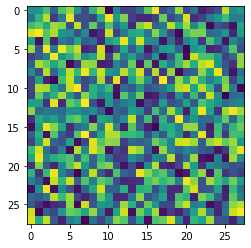

In [ ]:
random_image=np.random.uniform(0,1,784)
plt.imshow(random_image.reshape(28,28))

In [ ]:
prob=model.predict(np.array([random_image]))
print(prob)

1/1 [==============================] - 0s 51ms/step
[[1.0000000e+00 2.3375349e-10 1.3757552e-10 1.7878901e-10 2.0109373e-11
  1.5569084e-10 5.1708871e-10 4.5854764e-11 5.6507232e-10 1.2633311e-10]]


In [ ]:
#functional API or sequential function
#convolutionn NN which is faster then this
#RNN     translate hindi to english
#LSTNN   improve ment of RNN
#Attention NN